**1. Imports:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
!unzip data.zip

Archive:  data.zip
   creating: data/
  inflating: __MACOSX/._data         
   creating: data/paper/
  inflating: __MACOSX/data/._paper   
   creating: data/metal/
  inflating: __MACOSX/data/._metal   
   creating: data/cardboard/
  inflating: __MACOSX/data/._cardboard  
   creating: data/glass/
  inflating: __MACOSX/data/._glass   
   creating: data/plastic/
  inflating: __MACOSX/data/._plastic  
  inflating: data/paper/paper283.jpg  
  inflating: __MACOSX/data/paper/._paper283.jpg  
  inflating: data/paper/paper297.jpg  
  inflating: __MACOSX/data/paper/._paper297.jpg  
  inflating: data/paper/paper526.jpg  
  inflating: __MACOSX/data/paper/._paper526.jpg  
  inflating: data/paper/paper240.jpg  
  inflating: __MACOSX/data/paper/._paper240.jpg  
  inflating: data/paper/paper254.jpg  
  inflating: __MACOSX/data/paper/._paper254.jpg  
  inflating: data/paper/paper532.jpg  
  inflating: __MACOSX/data/paper/._paper532.jpg  
  inflating: data/paper/paper268.jpg  
  inflating: __MACOSX/data

**2. Data preparation:**

In [3]:
file_path="data"

x=[]

for folder in os.listdir(file_path):
    sub_path=file_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img        
        img_arr=cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
        x.append(img_arr)

In [4]:
x=np.array(x)

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   horizontal_flip=True,
                                   vertical_flip=True)

In [6]:
training_set = train_datagen.flow_from_directory(file_path, target_size = (384, 512),
                                                 batch_size = 120, class_mode = "categorical")

Found 2390 images belonging to 5 classes.


In [7]:
train_y=training_set.classes

training_set.class_indices

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4}

In [8]:
train_y.shape

(2390,)

**2. First model:**

In [9]:
first_model = Sequential([
    Conv2D(filters=8, kernel_size=3, padding='same', activation='relu', 
           input_shape=(384, 512, 3)),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=10, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=12, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=14, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=18, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Dropout(0.5),

    Flatten(),
    
    Dense(5, activation='softmax')
])

first_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 384, 512, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 192, 256, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 192, 256, 10)      730       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 96, 128, 10)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 128, 12)       1092      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 48, 64, 12)       0

In [10]:
first_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
                    loss="sparse_categorical_crossentropy", 
                    metrics=["accuracy"])

early_stop=EarlyStopping(monitor="accuracy",
                         mode="auto",
                         verbose=1,
                         patience=10)

In [11]:
first_results = first_model.fit(x,
                                train_y,
                                validation_split=0.05,
                                epochs=200,
                                callbacks=[early_stop])

Epoch 1/200
71/71 [==============================] - 21s 143ms/step - loss: 2.7323 - accuracy: 0.2520 - val_loss: 1.7270 - val_accuracy: 0.1167
Epoch 2/200
71/71 [==============================] - 9s 123ms/step - loss: 1.5373 - accuracy: 0.3145 - val_loss: 1.6736 - val_accuracy: 0.2750
Epoch 3/200
71/71 [==============================] - 9s 123ms/step - loss: 1.4421 - accuracy: 0.3762 - val_loss: 1.1748 - val_accuracy: 0.5917
Epoch 4/200
71/71 [==============================] - 9s 129ms/step - loss: 1.3493 - accuracy: 0.4163 - val_loss: 1.1557 - val_accuracy: 0.5083
Epoch 5/200
71/71 [==============================] - 9s 123ms/step - loss: 1.3171 - accuracy: 0.4432 - val_loss: 0.6747 - val_accuracy: 0.7667
Epoch 6/200
71/71 [==============================] - 9s 123ms/step - loss: 1.3080 - accuracy: 0.4317 - val_loss: 0.8116 - val_accuracy: 0.6917
Epoch 7/200
71/71 [==============================] - 9s 122ms/step - loss: 1.3934 - accuracy: 0.4004 - val_loss: 1.1184 - val_accuracy: 0.533

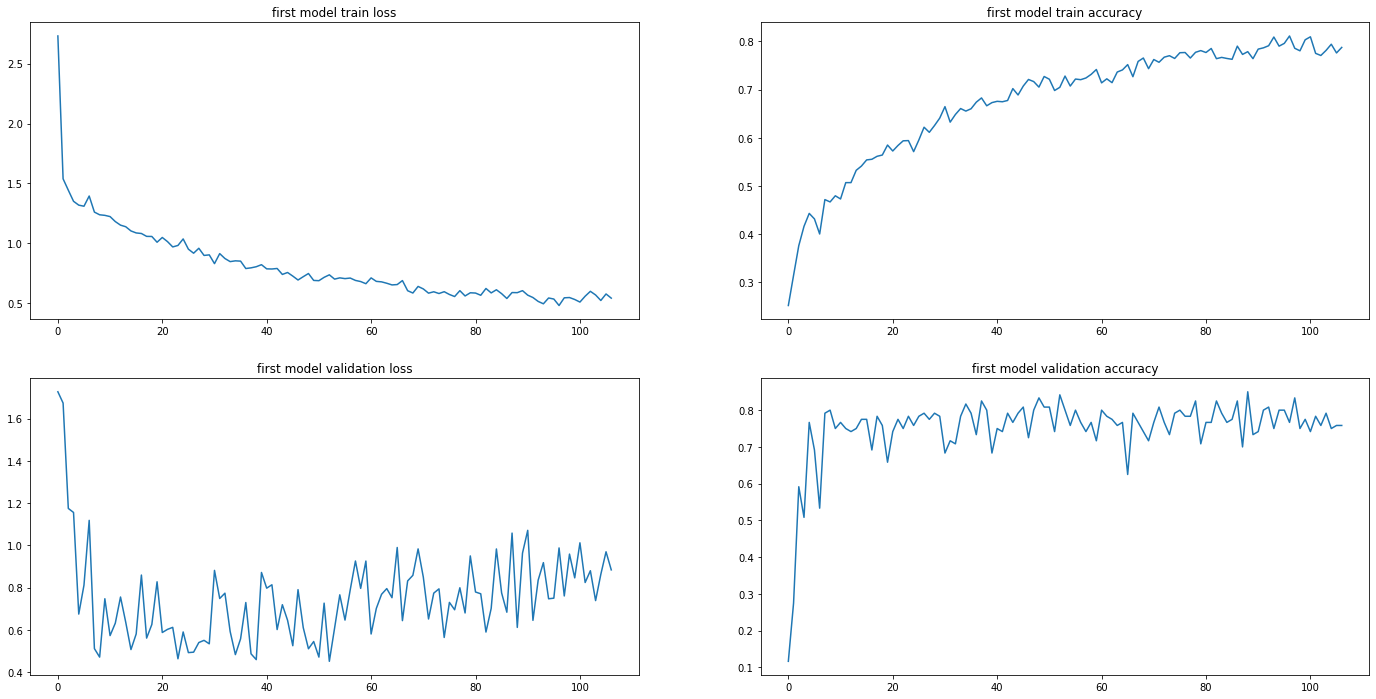

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(24,12))

ax[0][0].plot(first_results.history["loss"])
ax[0][1].plot(first_results.history["accuracy"])
ax[1][0].plot(first_results.history["val_loss"])
ax[1][1].plot(first_results.history["val_accuracy"])

ax[0][0].set_title("first model train loss")
ax[0][1].set_title("first model train accuracy")
ax[1][0].set_title("first model validation loss")
ax[1][1].set_title("first model validation accuracy")
plt.show()

**3. Second model:**

In [13]:
second_model = Sequential([
    Conv2D(filters=8, kernel_size=3, padding='same', activation='relu', 
           input_shape=(384, 512, 3)),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=24, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=40, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=48, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Dropout(0.5),

    Flatten(),
    
    Dense(5, activation='softmax')
])

second_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 384, 512, 8)       224       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 192, 256, 8)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 192, 256, 16)      1168      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 96, 128, 16)      0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 96, 128, 24)       3480      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 48, 64, 24)      

In [14]:
second_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
                     loss="sparse_categorical_crossentropy", 
                     metrics=["accuracy"])

In [15]:
second_results = second_model.fit(x,
                                  train_y,
                                  validation_split=0.05,
                                  epochs=200,
                                  callbacks=[early_stop])

Epoch 1/200
71/71 [==============================] - 13s 157ms/step - loss: 2.8037 - accuracy: 0.2599 - val_loss: 1.2094 - val_accuracy: 0.6417
Epoch 2/200
71/71 [==============================] - 10s 141ms/step - loss: 1.4533 - accuracy: 0.3405 - val_loss: 0.7212 - val_accuracy: 0.7917
Epoch 3/200
71/71 [==============================] - 10s 141ms/step - loss: 1.4083 - accuracy: 0.3982 - val_loss: 0.6970 - val_accuracy: 0.7250
Epoch 4/200
71/71 [==============================] - 10s 141ms/step - loss: 1.3159 - accuracy: 0.4335 - val_loss: 0.8102 - val_accuracy: 0.6917
Epoch 5/200
71/71 [==============================] - 10s 140ms/step - loss: 1.2845 - accuracy: 0.4423 - val_loss: 0.7134 - val_accuracy: 0.7250
Epoch 6/200
71/71 [==============================] - 10s 140ms/step - loss: 1.2765 - accuracy: 0.4630 - val_loss: 1.0441 - val_accuracy: 0.6083
Epoch 7/200
71/71 [==============================] - 10s 141ms/step - loss: 1.2064 - accuracy: 0.4793 - val_loss: 0.4979 - val_accuracy:

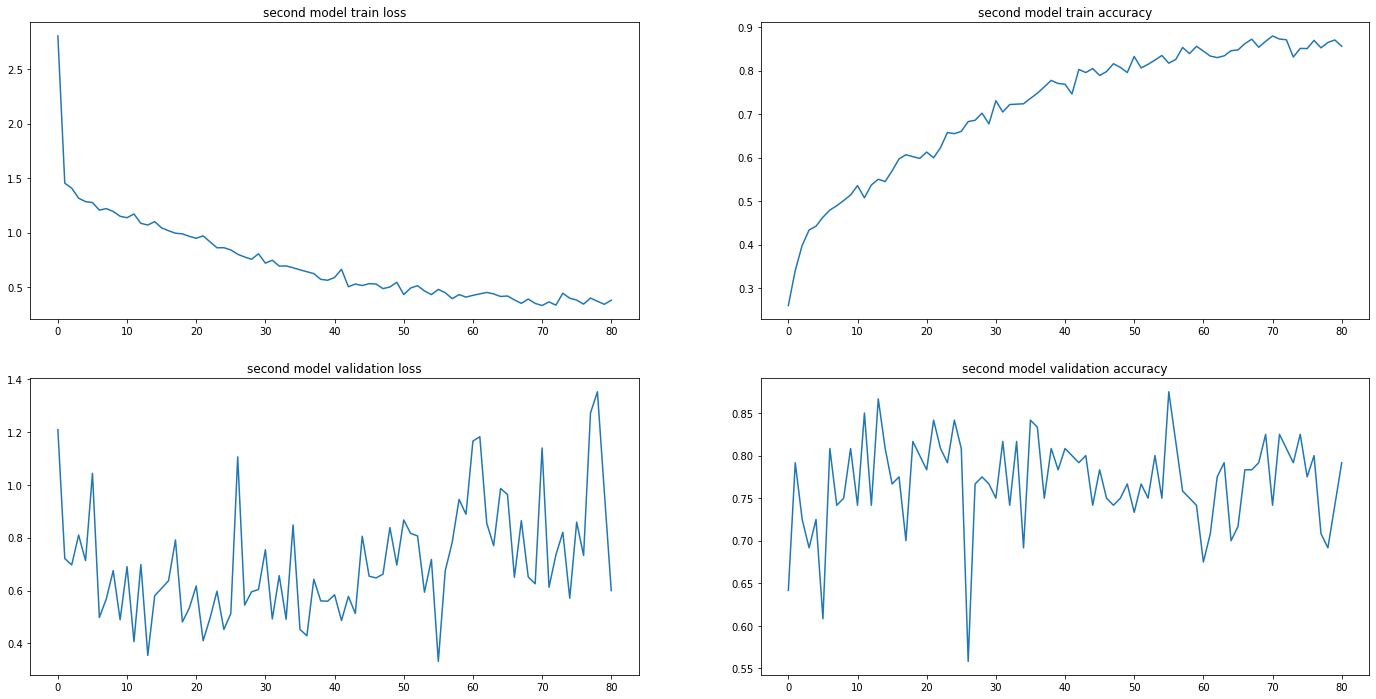

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(24,12))

ax[0][0].plot(second_results.history["loss"])
ax[0][1].plot(second_results.history["accuracy"])
ax[1][0].plot(second_results.history["val_loss"])
ax[1][1].plot(second_results.history["val_accuracy"])

ax[0][0].set_title("second model train loss")
ax[0][1].set_title("second model train accuracy")
ax[1][0].set_title("second model validation loss")
ax[1][1].set_title("second model validation accuracy")
plt.show()

**4. Third model:**

In [17]:
third_model = Sequential([
    Conv2D(filters=8, kernel_size=3, kernel_regularizer="l1_l2",
           padding='same', activation='relu', input_shape=(384, 512, 3)),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=10, kernel_size=3, kernel_regularizer="l1_l2",
           padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=12, kernel_size=3, kernel_regularizer="l1_l2",
           padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=14, kernel_size=3, kernel_regularizer="l1_l2",
           padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Dropout(0.5),

    Flatten(),
    
    Dense(5, activation='softmax')
])

third_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 384, 512, 8)       224       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 192, 256, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 192, 256, 10)      730       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 96, 128, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 96, 128, 12)       1092      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 48, 64, 12)      

In [18]:
third_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
                    loss="sparse_categorical_crossentropy", 
                    metrics=["accuracy"])

In [19]:
third_results = third_model.fit(x,
                                train_y,
                                validation_split=0.05,
                                epochs=200,
                                callbacks=[early_stop])

Epoch 1/200
71/71 [==============================] - 10s 124ms/step - loss: 23.9385 - accuracy: 0.2154 - val_loss: 4.7491 - val_accuracy: 0.0500
Epoch 2/200
71/71 [==============================] - 8s 120ms/step - loss: 4.2300 - accuracy: 0.2687 - val_loss: 3.9945 - val_accuracy: 0.4167
Epoch 3/200
71/71 [==============================] - 9s 121ms/step - loss: 3.7544 - accuracy: 0.3608 - val_loss: 3.5705 - val_accuracy: 0.6083
Epoch 4/200
71/71 [==============================] - 9s 120ms/step - loss: 3.4447 - accuracy: 0.4348 - val_loss: 3.6313 - val_accuracy: 0.4917
Epoch 5/200
71/71 [==============================] - 9s 120ms/step - loss: 3.2368 - accuracy: 0.4771 - val_loss: 3.3821 - val_accuracy: 0.6083
Epoch 6/200
71/71 [==============================] - 9s 120ms/step - loss: 3.0445 - accuracy: 0.5233 - val_loss: 3.3875 - val_accuracy: 0.5417
Epoch 7/200
71/71 [==============================] - 9s 122ms/step - loss: 2.9055 - accuracy: 0.5612 - val_loss: 3.4138 - val_accuracy: 0.49

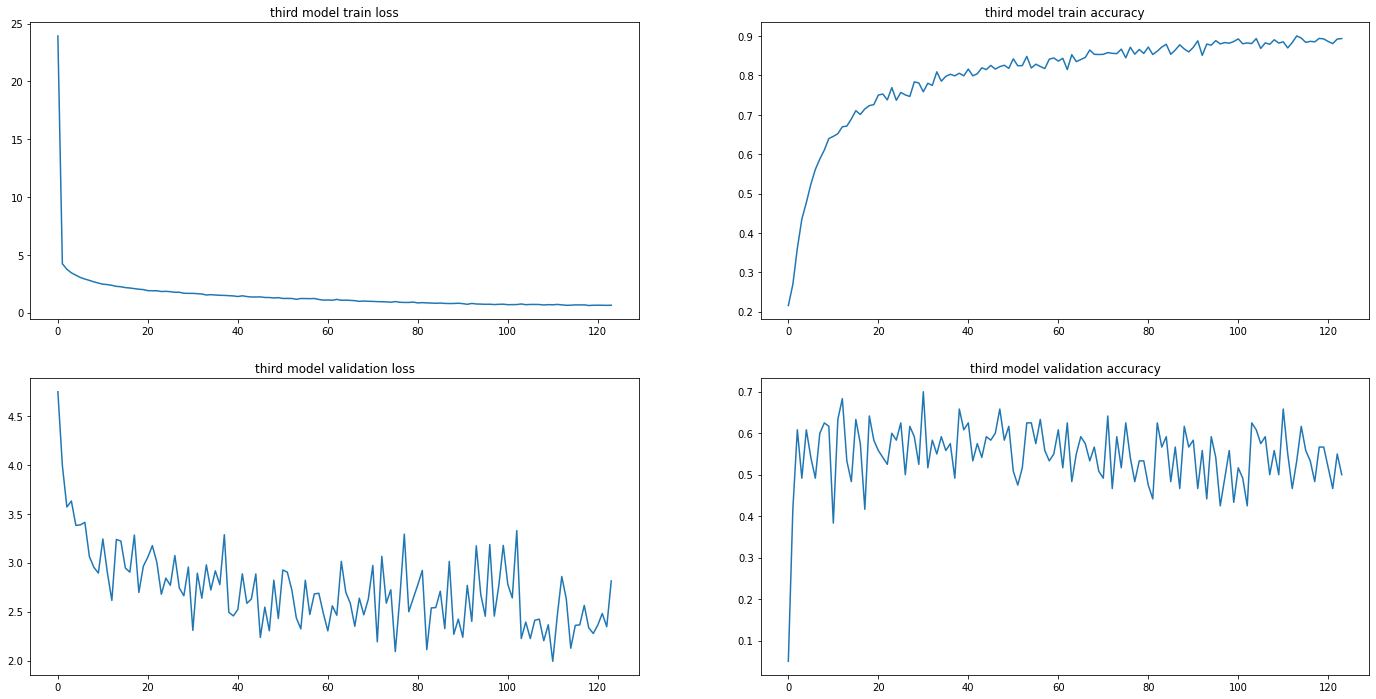

In [20]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(24,12))

ax[0][0].plot(third_results.history["loss"])
ax[0][1].plot(third_results.history["accuracy"])
ax[1][0].plot(third_results.history["val_loss"])
ax[1][1].plot(third_results.history["val_accuracy"])

ax[0][0].set_title("third model train loss")
ax[0][1].set_title("third model train accuracy")
ax[1][0].set_title("third model validation loss")
ax[1][1].set_title("third model validation accuracy")
plt.show()

**5. Fourth model:**

In [21]:
fourth_model = Sequential([
    Conv2D(filters=8, kernel_size=3, kernel_regularizer="l1_l2",
           padding='same', activation='relu', input_shape=(384, 512, 3)),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=10, kernel_size=3, kernel_regularizer="l1_l2",
           padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=12, kernel_size=3, kernel_regularizer="l1_l2",
           padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=14, kernel_size=3, kernel_regularizer="l1_l2",
           padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=16, kernel_size=3, kernel_regularizer="l1_l2",
           padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=18, kernel_size=3, kernel_regularizer="l1_l2",
           padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Dropout(0.5),

    Flatten(),
    
    Dense(5, activation='softmax')
])

fourth_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 384, 512, 8)       224       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 192, 256, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 192, 256, 10)      730       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 96, 128, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 96, 128, 12)       1092      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 48, 64, 12)      

In [22]:
fourth_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
                     loss="sparse_categorical_crossentropy", 
                     metrics=["accuracy"])

In [23]:
fourth_results = fourth_model.fit(x,
                                  train_y,
                                  validation_split=0.05,
                                  epochs=200,
                                  callbacks=[early_stop])

Epoch 1/200
71/71 [==============================] - 10s 128ms/step - loss: 8.2856 - accuracy: 0.2256 - val_loss: 7.0723 - val_accuracy: 0.0083
Epoch 2/200
71/71 [==============================] - 9s 122ms/step - loss: 6.1391 - accuracy: 0.2912 - val_loss: 5.6921 - val_accuracy: 0.0333
Epoch 3/200
71/71 [==============================] - 9s 124ms/step - loss: 4.9784 - accuracy: 0.3414 - val_loss: 4.7479 - val_accuracy: 0.1833
Epoch 4/200
71/71 [==============================] - 9s 122ms/step - loss: 4.2825 - accuracy: 0.3471 - val_loss: 4.2286 - val_accuracy: 0.2250
Epoch 5/200
71/71 [==============================] - 9s 123ms/step - loss: 3.8006 - accuracy: 0.3621 - val_loss: 3.6538 - val_accuracy: 0.4250
Epoch 6/200
71/71 [==============================] - 9s 123ms/step - loss: 3.4170 - accuracy: 0.3868 - val_loss: 3.3135 - val_accuracy: 0.4500
Epoch 7/200
71/71 [==============================] - 9s 123ms/step - loss: 3.1284 - accuracy: 0.4062 - val_loss: 2.4720 - val_accuracy: 0.816

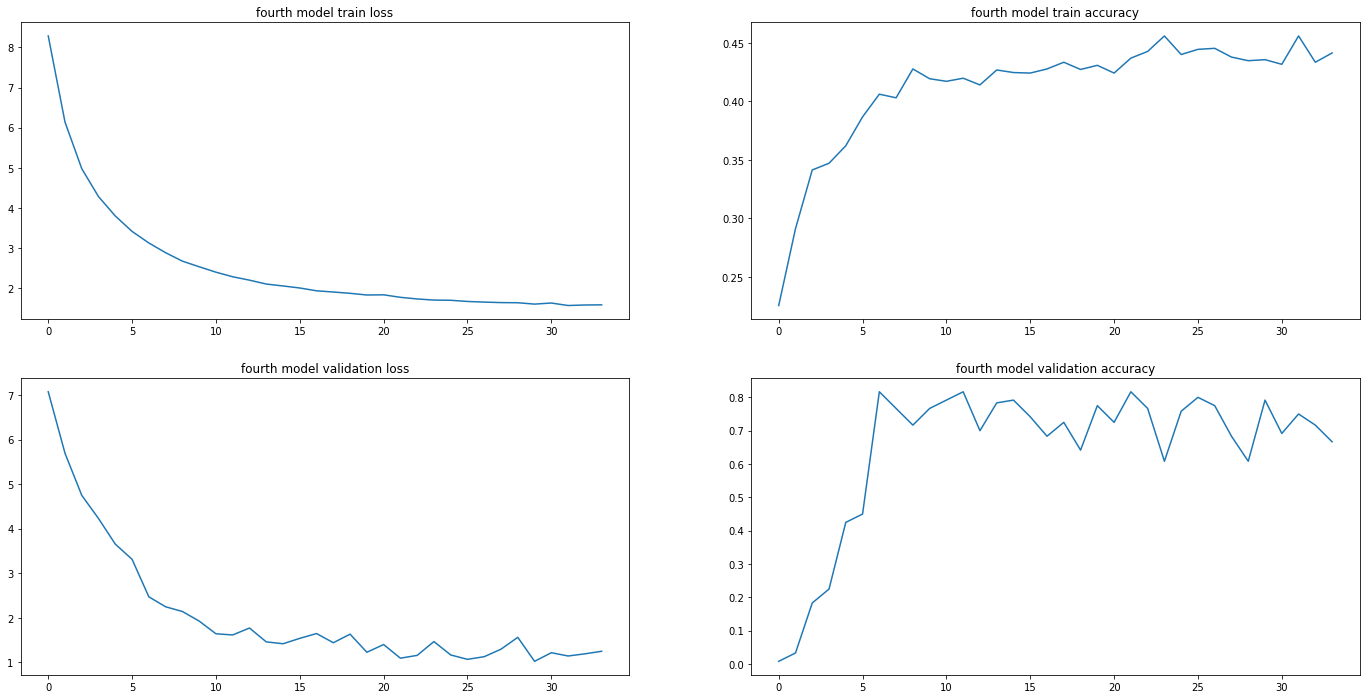

In [24]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(24,12))

ax[0][0].plot(fourth_results.history["loss"])
ax[0][1].plot(fourth_results.history["accuracy"])
ax[1][0].plot(fourth_results.history["val_loss"])
ax[1][1].plot(fourth_results.history["val_accuracy"])

ax[0][0].set_title("fourth model train loss")
ax[0][1].set_title("fourth model train accuracy")
ax[1][0].set_title("fourth model validation loss")
ax[1][1].set_title("fourth model validation accuracy")
plt.show()